In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
import xlrd
from sklearn.decomposition import PCA 
pd.options.display.float_format = '{:.3f}'.format

In [2]:
file = ('C:\\Users\\Abe\\Data Science Bootcamp\\Unit 2\\Crime\\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
df = pd.read_excel(file, header=4)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [15]:
cols = ['city', 'population', 'violent_crime', 'murder_mans','rape1','rape2',
        'robbery', 'agg_ass','prop_crime','burglary','larc_theft','gta','arson']

df.columns = cols
dfcl = df.drop(['rape1','arson'],axis=1)
dfcl = dfcl.dropna()
dfcl.drop(dfcl[dfcl['population'] > 100000].index,inplace=True)

In [16]:
dfcl.head()

,city,population,violent_crime,murder_mans,rape2,robbery,agg_ass,prop_crime,burglary,larc_theft,gta
0,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000
2,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000
3,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000
4,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000


In [17]:
# Correlation of the data set.
# Prop_crime is the aggregation of burglary, larc_theft and gta so we cannot use those in our model

dfcl.corr()

,population,violent_crime,murder_mans,rape2,robbery,agg_ass,prop_crime,burglary,larc_theft,gta
population,1.000,0.644,0.490,0.592,0.643,0.627,0.849,0.723,0.858,0.743
violent_crime,0.644,1.000,0.801,0.809,0.977,0.994,0.814,0.898,0.761,0.921
murder_mans,0.490,0.801,1.000,0.680,0.797,0.779,0.593,0.665,0.550,0.709
rape2,0.592,0.809,0.680,1.000,0.731,0.810,0.787,0.829,0.755,0.713
robbery,0.643,0.977,0.797,0.731,1.000,0.950,0.773,0.858,0.719,0.935
agg_ass,0.627,0.994,0.779,0.810,0.950,1.000,0.813,0.897,0.761,0.898
prop_crime,0.849,0.814,0.593,0.787,0.773,0.813,1.000,0.926,0.994,0.847
burglary,0.723,0.898,0.665,0.829,0.858,0.897,0.926,1.000,0.880,0.879
larc_theft,0.858,0.761,0.550,0.755,0.719,0.761,0.994,0.880,1.000,0.803
gta,0.743,0.921,0.709,0.713,0.935,0.898,0.847,0.879,0.803,1.000


In [30]:
df_ss = dfcl.drop(['city','burglary','larc_theft','gta'], axis=1)
X = df_ss.drop(['population','prop_crime'],axis=1)

skl_pca = PCA(n_components=4)
pca_out = skl_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    skl_pca.explained_variance_ratio_
)

out = pd.DataFrame(pca_out, columns=['ft1','ft2','ft3','ft4'])

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [  9.92994366e-01   6.30862918e-03   6.52633995e-04   4.43707696e-05]


,ft1,ft2,ft3,ft4
0,-35.921,0.809,0.582,0.059
1,-31.958,-0.673,0.896,0.069
2,-31.958,-0.673,0.896,0.069
3,939.608,-55.294,7.243,1.340
4,-7.856,-3.500,-1.332,-0.268
5,-29.993,2.499,0.636,-0.021
6,-31.958,-0.673,0.896,0.069
7,-25.877,2.916,-1.564,-0.225
8,0.998,2.625,1.844,-0.226
9,-35.921,0.809,0.582,0.059


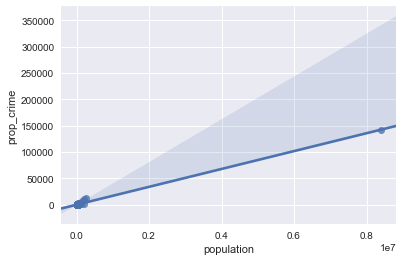

In [12]:
# Look at population outliers
# Removed largest city. Maybe remove cities less than 100K and only focus on small cities?
sns.regplot(df_ss.population,df_ss.prop_crime)
plt.show()

In [14]:
# Drop the outlier
df_ss.drop(df_ss[df_ss['population'] > 100000].index,inplace=True)
print (df_ss.sort('population',ascending=False))

     population         popsqd  murder2  robbery2  prop_crime
3     97956.000 9595377936.000        1         1    4090.000
126   96667.000 9344508889.000        0         1    2303.000
267   87204.000 7604537616.000        1         1     567.000
57    80705.000 6513297025.000        0         1    1515.000
214   78800.000 6209440000.000        0         1    1391.000
53    78361.000 6140446321.000        0         1    2689.000
62    78215.000 6117586225.000        0         1    1990.000
206   68071.000 4633661041.000        1         1    1436.000
285   66041.000 4361413681.000        1         1    2800.000
321   61686.000 3805162596.000        1         1    2528.000
314   58082.000 3373518724.000        1         1    1099.000
340   57559.000 3313038481.000        1         1    1232.000
140   55198.000 3046819204.000        1         1     958.000
152   51506.000 2652868036.000        1         1    1353.000
301   50603.000 2560663609.000        0         1    1020.000
315   49

c:\users\abe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\users\abe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


count     340.000
mean    13535.050
std     16664.734
min       526.000
25%      3003.000
50%      7106.000
75%     17686.250
max     97956.000
Name: population, dtype: float64


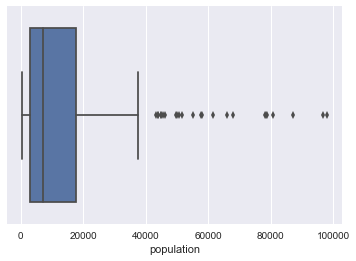

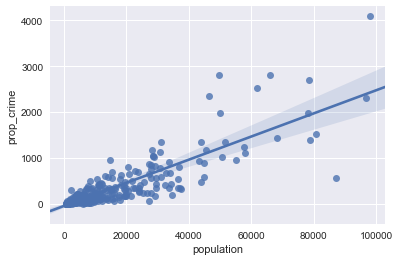

In [24]:
# Look at population again

print(df_ss.population.describe())
sns.boxplot(df_ss.population)
plt.show()

sns.regplot(df_ss.population, df_ss.prop_crime)
plt.show()

c:\users\abe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


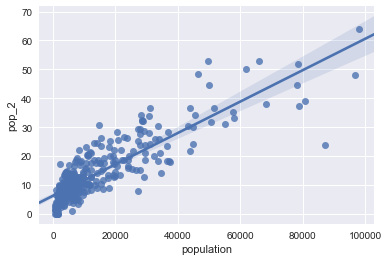

,population,popsqd,murder2,robbery2,prop_crime,pop_2
2,2846.000,8099716.000,0,0,16.000,4.000
3,97956.000,9595377936.000,1,1,4090.000,63.953
4,6388.000,40806544.000,0,1,223.000,14.933
5,4089.000,16719921.000,0,1,46.000,6.782
6,1781.000,3171961.000,0,0,10.000,3.162


In [33]:
df_ss['pop_2'] = np.sqrt(df_ss['prop_crime'])

sns.regplot(df_ss.population, df_ss.pop_2)
plt.show()

df_ss.head()

In [34]:
# Lets look at the regression

regr = linear_model.LinearRegression()

x = df_ss[['population','popsqd','murder2','robbery2']]
y = df_ss['pop_2']

regr.fit(x, y)

print ('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)


Coefficients: 
 [  5.66997725e-04  -1.65056996e-09   2.94750675e+00   4.62369569e+00]
Intercept: 
 3.54719667273
